<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/GMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train CSV**

Data Cleaning

Data cleaning Tasks : Handling missing values. Correcting data entry errors. Standardizing data formats. Encoding categorical variables. Removing duplicates or irrelevant data.

In [1]:
import pandas as pd
train = pd.read_csv('traincsv.csv')

<ipython-input-1-d1a2a63d4ac5>:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('traincsv.csv')


In [2]:
#convert the strings to numeric value
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype(float)
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype(float)
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype(float)

Customer ID

In [3]:
#Identifying missing rows in customerId
missing_index = train[train['Customer_ID'].isna()].index
missing_index

Index([], dtype='int64')

In [4]:
missing_percentage = (train['Customer_ID'].isna().sum() / len(train)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 0.00%


In [5]:
# Remove rows with missing values in customerId
train = train.dropna()

Outlets

In [6]:
#Identifying unique Ids in test
train["outlet_city"].unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya'], dtype=object)

Data Transformation (Encording Categorical Variables)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit and transform the outlet_city column
train['outlet_city'] = le.fit_transform(train['outlet_city'])

# Check encoding
print(train[['outlet_city']].head())

   outlet_city
0            3
1            5
2            9
3            9
4            3


In [8]:
train['outlet_city'].unique()

array([3, 5, 9, 1, 0, 7, 2, 8, 4, 6])

Luxury sales

In [9]:
# Convert numeric values stored as strings to float
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce')
train['luxury_sales'].dtype

dtype('float64')

In [10]:
train.isna().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


<Axes: xlabel='luxury_sales', ylabel='Count'>

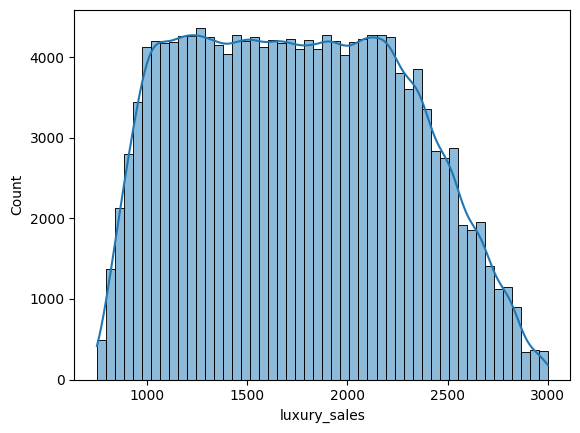

In [11]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['luxury_sales'], bins=50, kde=True)

Since its right skewwed using the median approah.

In [12]:
train['luxury_sales'].fillna(train['luxury_sales'].median(), inplace=True)

<ipython-input-12-722a16d15c84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['luxury_sales'].fillna(train['luxury_sales'].median(), inplace=True)


In [13]:
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


Fresh Sales

In [14]:
# Convert numeric values stored as strings to float
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce')
train['fresh_sales'].dtype

dtype('float64')

In [15]:
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


<Axes: xlabel='fresh_sales', ylabel='Count'>

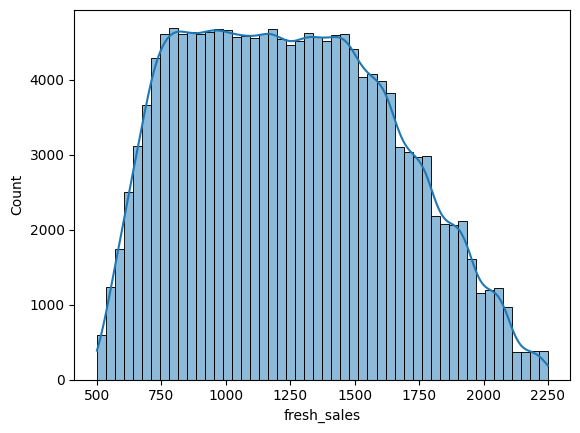

In [16]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['fresh_sales'], bins=50, kde=True)

In [17]:
train['fresh_sales'].fillna(train['fresh_sales'].median(), inplace=True)

<ipython-input-17-fce729a411ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['fresh_sales'].fillna(train['fresh_sales'].median(), inplace=True)


Dry Sales

In [18]:
# Convert numeric values stored as strings to float
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce') # Changed 'df' to 'train'
train['dry_sales'].dtype

dtype('float64')

<Axes: xlabel='dry_sales', ylabel='Count'>

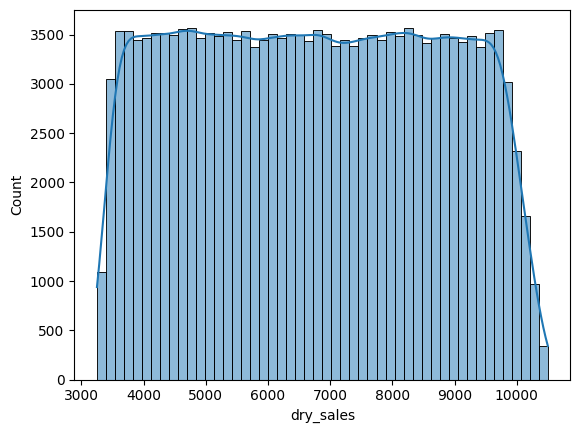

In [19]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['dry_sales'], bins=50, kde=True)

In [20]:
train['dry_sales'].fillna(train['dry_sales'].median(), inplace=True)

<ipython-input-20-b485c19bb8c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['dry_sales'].fillna(train['dry_sales'].median(), inplace=True)


Data Transformation (cluster Analysis)

In [21]:
# Convert numeric values stored as strings to float
train['cluster_catgeory'] = pd.to_numeric(train['cluster_catgeory'], errors='coerce')
train['cluster_catgeory'].dtype

dtype('float64')

In [22]:
train.describe()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,1.622790e+05,162279.000000,162279.000000,162279.000000,162279.000000,162278.000000
mean,1.038759e+07,4.507712,1748.017534,1249.064495,6741.169351,4.000518
std,2.235639e+05,2.874163,529.446797,393.951084,1958.005603,0.237636
min,1.000000e+07,0.000000,750.150000,500.000000,3250.000000,1.000000
25%,1.019393e+07,2.000000,1298.630000,921.800000,5043.740000,4.000000
50%,1.038744e+07,5.000000,1733.600000,1229.410000,6734.720000,4.000000
75%,1.058148e+07,7.000000,2170.940000,1545.320000,8424.900000,4.000000
max,1.077415e+07,9.000000,2999.800000,2249.700000,10498.600000,99.000000


In [23]:
#Identifying outliers
valid_categories = [ 1, 2, 3, 4, 5, 6]
outliers = train[~train['cluster_catgeory'].isin(valid_categories)]
#Checking which outliers exist
print(outliers['cluster_catgeory'].unique())

[99. nan]


In [24]:
train_cleaned = train[train['cluster_catgeory'].isin(valid_categories)]

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162279 entries, 0 to 162293
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       162279 non-null  int64  
 1   outlet_city       162279 non-null  int64  
 2   luxury_sales      162279 non-null  float64
 3   fresh_sales       162279 non-null  float64
 4   dry_sales         162279 non-null  float64
 5   cluster_catgeory  162278 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 8.7 MB


In [26]:
print(train['cluster_catgeory'].isna().sum())  # Count missing values

1


In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['cluster_catgeory'] = encoder.fit_transform(train['cluster_catgeory'])
train['cluster_catgeory'].unique()

array([3, 0, 6, 1, 4, 2, 5, 7])

In [28]:
train_cleaned['outlet_city'].unique()

array([3, 5, 9, 1, 0, 7, 2, 8, 4, 6])

In [29]:
train_cleaned.to_csv('/content/traincsv.csv', index=False)
print("CSV file has been saved!")

CSV file has been saved!


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
from google.colab import files
train.to_csv('cleaned_Train.csv', encoding = 'utf-8-sig')
files.download('cleaned_Train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Normalization (scaling values between 0 and 1)

In [34]:
# Normalization for train_df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_train = pd.read_csv("cleaned_train.csv")
sales_columns = ["luxury_sales","fresh_sales", "dry_sales"]

# Correctly access the columns for scaling
cleaned_train[sales_columns] = scaler.fit_transform(cleaned_train[sales_columns])
print(cleaned_train)

        Unnamed: 0  Customer_ID  outlet_city  luxury_sales  fresh_sales  \
0                0     10493832            3      0.204232     0.146311   
1                1     10178643            5      0.373378     0.320101   
2                2     10513916            9      0.683986     0.560690   
3                3     10334589            9      0.677790     0.708499   
4                4     10458365            3      0.709150     0.897039   
...            ...          ...          ...           ...          ...   
162274      162289     10450578            7      0.676199     0.606710   
162275      162290     10279064            8      0.300913     0.475487   
162276      162291     10731641            8      0.627018     0.674721   
162277      162292     10562203            0      0.485964     0.504401   
162278      162293     10068254            4      0.517889     0.551283   

        dry_sales  cluster_catgeory  
0        0.281710                 3  
1        0.380366      

EDA For Cleaned Train Dataset

In [35]:
import matplotlib.pyplot as plt
import plotly.express as px

In [36]:
#Sales by City
city_sales = train.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig1 = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig1.show()